Hola **Constanza**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 

# **PROYECTO SPRINT 13**

### **DESCRIPCIÓN DEL PROYECTO**

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

- Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
    - identificar a los grupos objetivo;
    - sugerir medidas para reducir la rotación;
    - describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

- 'Churn' — la cancelación para el mes en cuestión
- Campos de dataset actuales:
    - Datos del usuario del mes anterior
        - 'gender'.
        - 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario
           donde se encuentra el gimnasio.
        - 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el
           gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos;
           en esos casos el gimnasio almacena información sobre los empleadores de
           los clientes).
        - Promo_friends — si el/la usuario/a originalmente se inscribió mediante
          una oferta “trae a un/a amigo/a” (se utilizó el código promocional de
          un/a amigo/a cuando pagaron el primer abono).
        - 'Phone' — si el/la usuario/a aportó el número de teléfono.
        - 'Age'.
        - 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por
           primera vez al gimnasio.

- Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
    - 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
    - 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
    - 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
    - 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo
       largo de la vida del cliente.
    - 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana
       durante el mes en curso.
    - 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros
       servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

Ruta de archivo: /datasets/gym_churn_us.csv. Descargar el dataset. 



### **Instrucciones para completar el proyecto**

## **Paso 1. Descarga los datos**

In [1]:
# Inportar librerîas y módulos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage 

from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leer los datos de DataFrame 'gym'

gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
# Revisión general de los datos

gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# Visualización de los primeras filas del DataFrame 'gym'

gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


En la información general del DataFrame 'gym' se observa que esta conformado por trece columnas como 'gender', 'Contract_period', 'lifetime', 'Avg_class_frequency_current_month', 'Churn' entre otras. La mayoría de estas columnas tiene ctip de datos enteros y flotantes. 
En cuanto a valores ausentes al parecer no hay debido a que todas las columnas presentan el mismo valor 400 non-null.

En la visualización de las primeras filas de la tabla 'gym' se puede notar que muchas de las columnas (para nuestro en este interes de este proyecto 'características'), presentan valores con denimonación binaria indicando que solo tienen dos valores 0 o 1. Otras columnas como 'Contract_period' o 'Age' tienen valores enteros y otras columnas como 'Avg_additional_charges_total' o 'Avg_class_frequency_total' tienen valores flotantes.

En la tabla no se encontaron datos de fecha porque lo es necesario hacer ningu2n ajuste en el tipo de datos datetime.

## **Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)**

In [5]:
# Revisión de nombres de columnas

gym.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [6]:
# Revisión de valores ausentes

gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
# Revisión de valores duplicados

gym.duplicated().sum()

0

Como una buena práctica dentro del Análisis Exploratorio de los Datos (EDA) se realizó la revisón de los nombres de la columnas, los valores ausentes y los valores duplicados. Se encontró que los nombres de la columnas no tienen espacio entre ellos y no hay presencia de valores ausentes (como se mencionó anterioemente) y de valores duplicados.

### 2.1. Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [8]:
# Métricas estadísticas de la columnas

gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Analizando el resultado del método decribe para DataFrame 'gym' se concluye lo siguiente:
1. La fila 'count' muestra la cantidad de datos en cada columna, es todos la cantidad es de 4,000, por lo tanto se puede confirmar que no carásterísticas ausentes en este DataFrame.
   
2. En la columna 'Age' se tiene una media de 29.18 y una desiación estándar de 3.26 años con base en estos valores se podria decir que se tienen usuarios entre 26 y 32 añons. Sin embargo, en los datos mínimos y máximos se tiene 18 y 41, indicando que tambien hay usuarios de otras edades (pudiendo ser valores atípicos).

3. Los gatos adicionales 'Avg_additional_charges_total' tienen un promedio de 146.95 y una desviación estándar de 96.35. Estos valores se puede complementar con los valores mínimo 0.15 y máximo 552.60. Esto indica que hay usuarios que solo utilizan el plan contratado sin ninún tipo de serivico adicionales, miesbtras hay otros usuarios que si acceden a los servicios adicionales ofrecidos por el gimnasio como productos deportivos, cosméticos, masajes o cafetería.

4. La columna 'Contact_period' (periodo de contrato) tiene una media de 4.68 y una desviación estandar de 4.55 relativamente alta. Esto puede indicar que el tiempo contratado pos los usuarios si es variable, de pendiendo de los intreses, prioridades y disponibilidad de los usuarios al realizar contratos de 1, 3, 6 y 12 meses.
   
5. Se puede ver que 'Avg_class_frequency_total' (frecuencia media de visitas por semana a lo largo de la vida del cliente) tiene un valor promedio de 1.88, desviación estándar 0.99. esto puede indicar que las visitar de los usuarios presentan valores consisentes y si se compara con con la media 1.77 y la desviación estándar 1.05 de 'Avg_class_frequency_current_month' (frecuencia media de visitas por semana durante el mes en curso) se confirman estos valores.
   
6. En cuanto a una característica importante 'Churn' presenta valores binarios de 0 (no abandono) y 1 (abandono). La media en esta columna es de 0.2652 y la desviación estándar es 0.44. Se podría asumir, que el promedio representa la proporción de clientes que abadonaron el gimnasio, en el mes actual este valor sería de 26.52%.

### 2.2. Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [9]:
# Valores medios

gym.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Con base en los datos de los valores medios para las características para los grupos de las personas que fueron y se quedaron, se asume que el grupo 0 hace referencia a quienes se quedaron y 1 a las personas que abandonaron.

1. Para las características 'genre', 'Near_Location' y 'Phone' practicamente no hay mucha diferencia entre las medias de ambos grupos.

2. 'Parner' y 'Promo_friends' se puede decir que un menor porcentaje de clientes que se fueron se inscribieron a través de una compañía asociada (Partner) o de la promoción de amigos (Promo_friends) en comparación con los clientes que se quedaron.

3. 'Contract_period', las personas que abandonaron tenían contratos más cortos con un promedio de 1.73 meses, en comparación con los los clientes que permanecieron 5.75 meses.

4. 'Group_visits', lo clientes que se fueron toman menos sesiones grupales 26.86% en comparación a los clientes que permanecieron 46.41%.

5. 'Age', se puede decir que los clientes con mayor edad 26.97 años en promedio permanecieron, mientros que los más jóvenes con un promedio de 26.96 años abandonaron el gimnasio.

6. 'Avg_additional_charges_total', los clientes que más gastan se quedaron 158.45, mientras los que menos gastaron 115.08 se fueron. Esto podría indicar n mayor nivel de compromiso.

7. 'Month_to_end_contract', el promedio de meses hasta el final del contrato para los clientes que se fueron era de 1.66 meses, lo que puede sugiere que muchos de los clientes abandonaron justo antes de que su contrato terminara. Los clientes que se quedaron tenían un promedio de 5.28 meses aún del contrato vigente.

8. 'Lifetime', los clientes que permanecierón tenían una vida promedio en el gimnasio de 4.71 meses, casi cinco veces más que los clientes que se fueron 0.99 meses. Esto puede indicar que la mayoría de los clientes que abandonan lo hacen en el primer mes.

9. 'Avg_class_frequency_total', la frecuencia media de visitas por semana (total) para los clientes que no abandonaron fue de 2.02, mientras que para los clientes que abandonaron fue de 1.45, notándose una diferencia importante en la frecuencia de permanencia entre ambos grupos.

10. 'Avg_class_frequency_current_month', el portamiento de esta caracteristica con respecto a la característica anterior es muy parecida. Las personas que permanecen, presentan una frecuancia de 2.23, prácticamente el doble de las personas que no continúan 1.04. Indicando que las personas que tienden a abandonar el gimnasio acuden con menos frecuencia a las actividades.

En conclusión, los clientes con mayor riesgo de abandono suelen ser más jóvenes, tienen contratos de menor duración (generalmente un mes), y visitan el gimnasio con menos frecuencia. Por otro lado, los clientes que se quedan están más comprometidos, tienen una mayor frecuencia de visitas, gastan más en servicios adicionales y han sido clientes por más tiempo con contratos más largos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, analizaste muy bien de manera inicial los datos con lo que trabajarás
</div>

### 2.3. Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

In [10]:
# Crear una función para realizar hisogramas para las características

def histogram(df, feature, feature_key):

    # Crear copia del DataFrame
    df_new = df.copy()
    df_new[feature] = df[feature_key]

    # Configurar colores de los histogramas
    unique_clusters = df[feature].unique()
    colors = sns.color_palette('viridis', len(unique_clusters))
    colors_dict = dict(zip(unique_clusters, colors))

    # Crear los gráficos
    for i in feature_key:
        for cl in df[feature].unique():
            sns.histplot(df_new[df_new[feature] == cl][i],
                         label = '{} = {}'.format(feature, str(cl)),
                         bins=10,
                         color = colors_dict[cl],
                         alpha = 0.5,
                         kde = True)

        plt.title(i)
        plt.legend()
        plt.show();

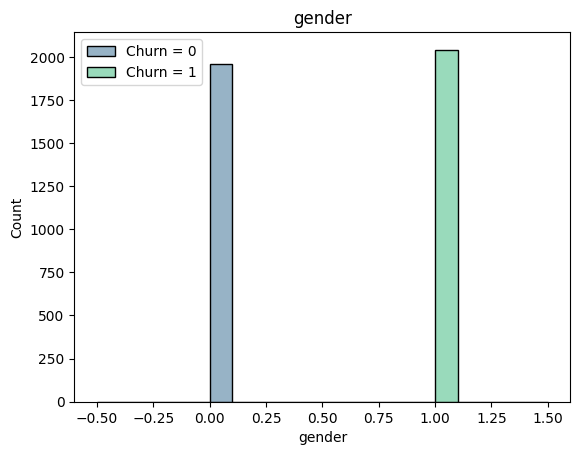

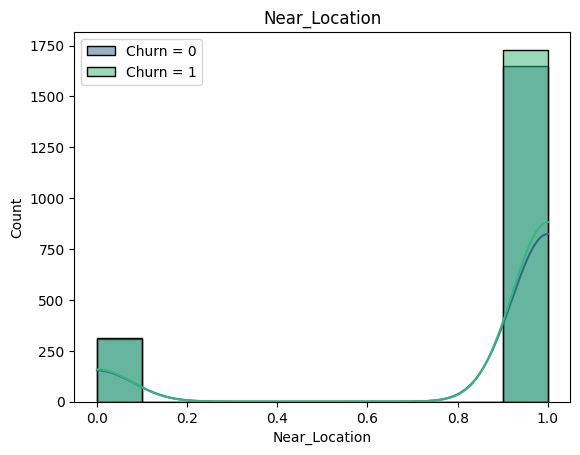

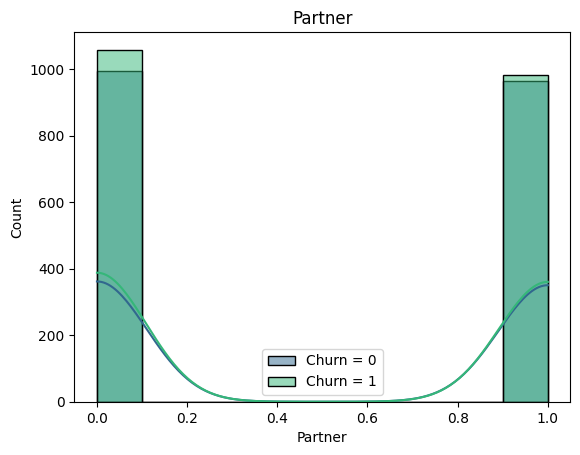

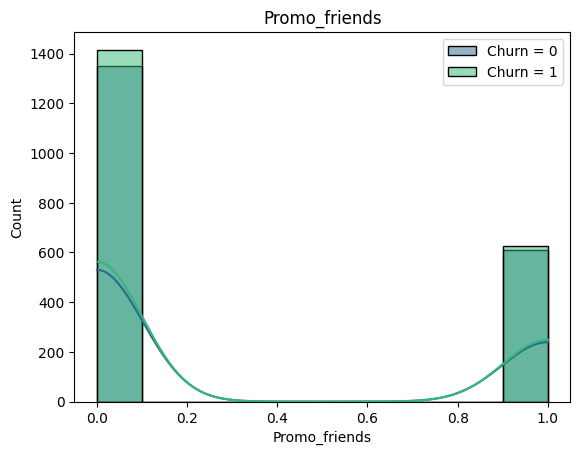

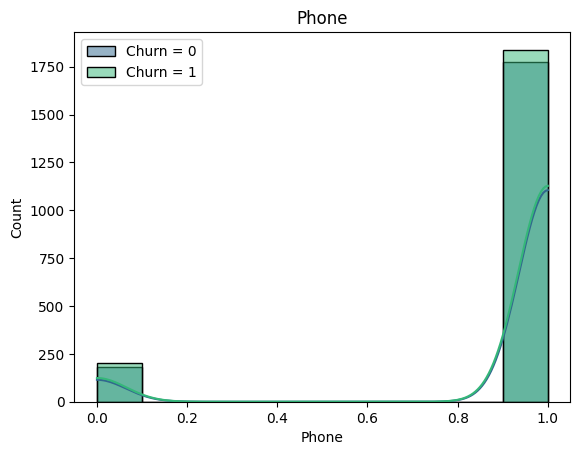

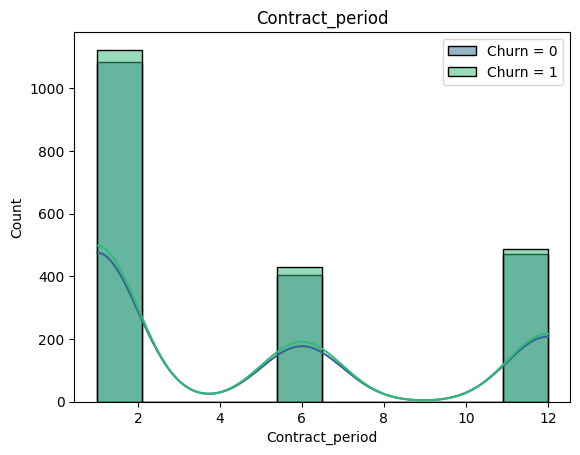

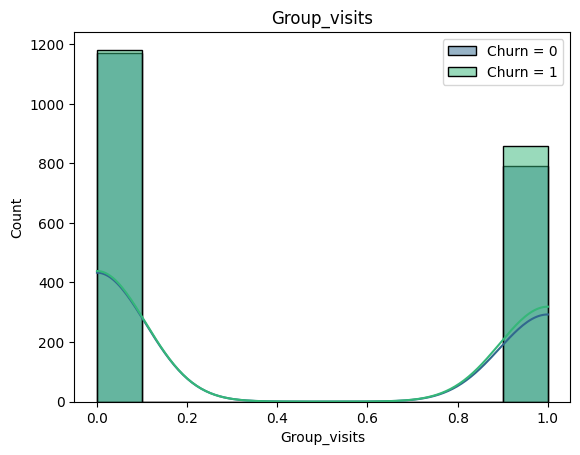

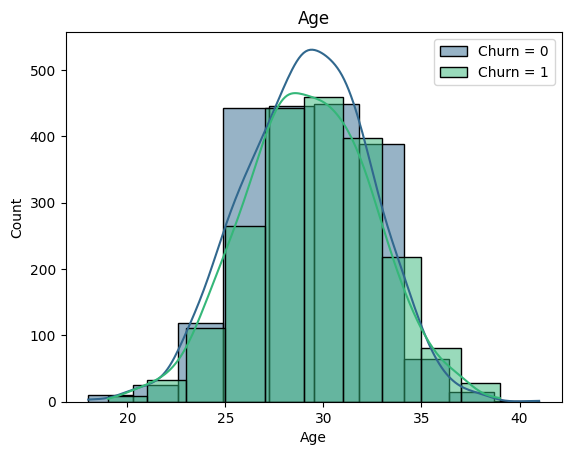

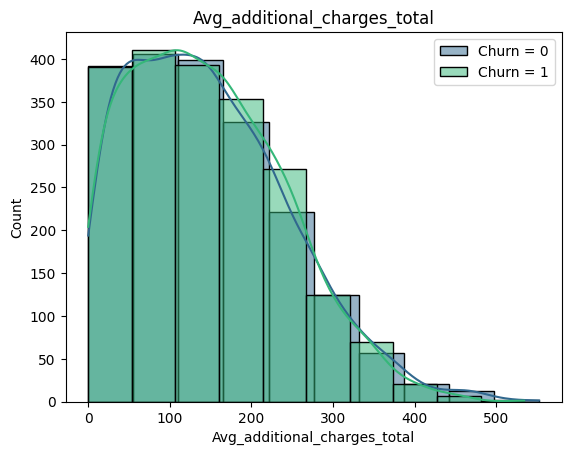

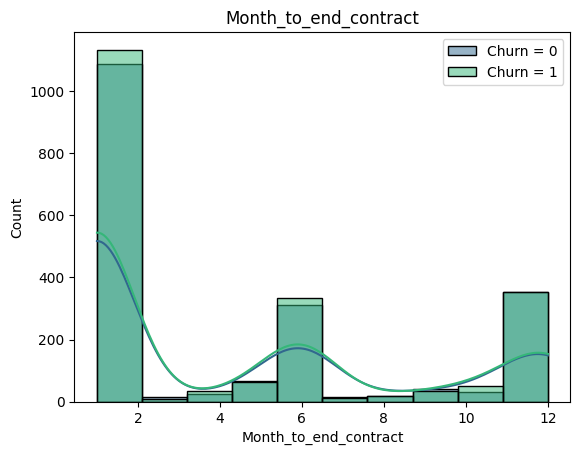

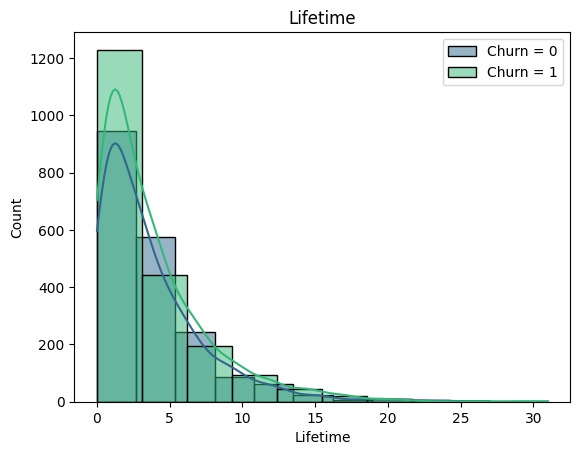

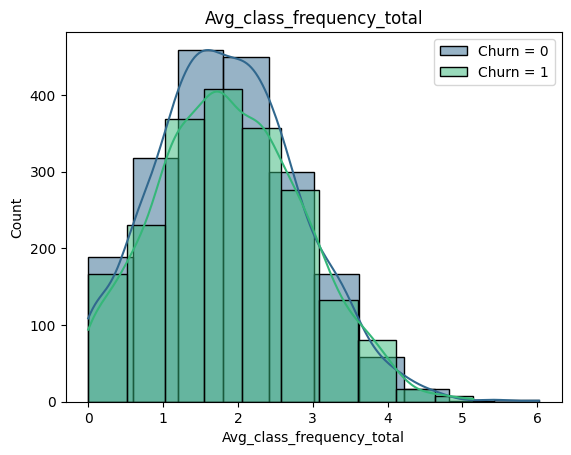

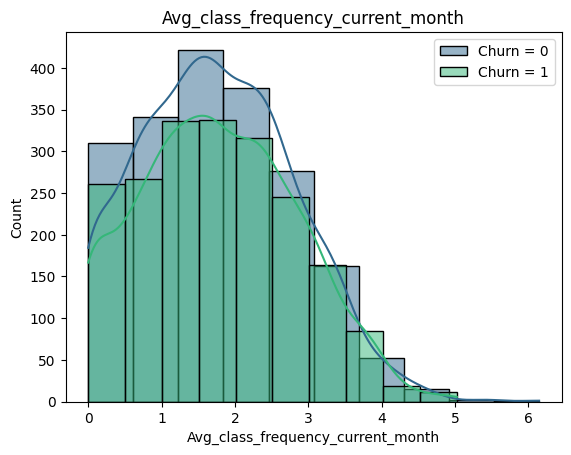

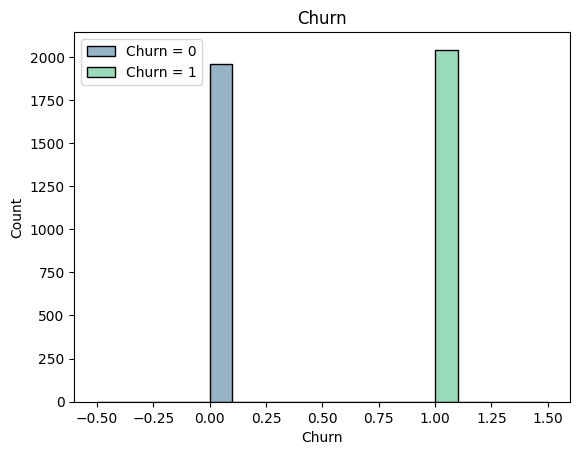

In [11]:
# Trazar los histogramas

histogram(gym, 'Churn', gym.columns)

De las gráficas de los histogramas se concluye lo siguiente:

1. 'genre'. La variable 'gender' no es un factor determinante para el abandono del gimnasio. La distribución de género es casi idéntica en ambos grupos (los que se fueron 0 y los que se quedaron 1), lo que puede sugierir que no hay una diferencia significativa en la tasa de cancelación entre géneros.

2. 'Near_Location'. La barra más alta se encuentra en Near_Location = 1, lo que indica que la gran mayoría de los clientes, tanto los que se quedaron como los que se fueron, viven o trabajan cerca del gimnasio. Esto tiene sentido, ya que la ubicación es un factor clave para elegir un gimnasio. Aunque la mayoría de los clientes están cerca (Near_Location = 1), la barra de Churn = 1 es mucho más pequeña que la de Churn = 0. Esto puede significar que un menor número de clientes que viven cerca abandonaron el gimnasio. Por el contrario, la barra de Churn = 1 en Near_Location = 0 es más alta en proporción, sugiriendo que las personas que no viven cerca son más propensas a cancelar la suscripción del gimnasio.

3. 'Parner'. Este gráfico muestra la distribución de los clientes que se inscribieron a través de una empresa asociada (Partner = 1) y los que no lo hicieron (Partner = 0). Hay una división casi igual en la cantidad de clientes que se unieron a través de un programa de descuentos a empleados y los que no lo hicieron. Ambos grupos tienen alrededor de 1000 clientes. Los clientes que se inscriben a través de una empresa asociada (Partner = 1) son menos propensos a la cancelación que aquellos que no lo hacen. 

4. 'Promo_friends'. Al analizar las barras, la altura de la sección verde claro (Churn = 1) es notablemente más pequeña en proporción al total de la barra en el grupo de Promo_friends = 1 que en el grupo de Promo_friends = 0. Esto significa que la tasa de abandono es menor entre los clientes que se inscribieron a través de esta promoción. Esto es importante para las campañas de promoción del gymnasio porque no solo atrae a nuevos clientes, sino que también ayudan a que permanezcan en el.

5. El histograma de la característica 'Phone' no es relevante para este análisis.

6. 'Contract_period'. Los clientes con contratos de 1 mes son los que más abandonan. La barra para el Contract_period de 1 mes es la más alta en el gráfico y, la sección verde claro (Churn = 1) ocupa una porción muy importante de la barra. Esto indica que un alto porcentaje de los clientes con el contrato más corto se van. A medida que la duración del contrato aumenta a 6 y 12 meses, la proporción de clientes que se van (verde claro) disminuye significativamente. Los contratos de 12 meses muestran la tasa de abandono más baja.

7. 'Gropu_visits'. Al analizar las barras, es evidente que el número de clientes que no toman clases grupales es mucho mayor que el de aquellos que sí las toman. La sección verde claro (Churn = 1) es mucho más pequeña en proporción a la barra total en el grupo de Group_visits = 1. Por el contrario, en el grupo de Group_visits = 0, la proporción de Churn = 1 es mucho mayor. La participación en sesiones grupales es un factor muy importante para la retención. Los clientes que participan en clases grupales son mucho menos propensos a cancelar su membresía que aquellos que no lo hacen.

8. 'Age'. Ambas distribuciones (clientes que se quedaron y los que se fueron) tienen una forma similar a una campana, con la mayoría de los clientes alrededor de los 29 o 30 años. La curva de distribución para los clientes que se quedaron (Churn = 0, azul) tiene su pico más alto alrededor de los 30-31 años. Por otro lado, la curva para los clientes que se fueron (Churn = 1, verde) tiene su pico un poco antes, alrededor de los 28-29 años. Esto nos indica que el grupo de clientes más propenso a la cancelación es ligeramente más joven que el grupo de clientes que se queda.

9. 'Avg_aditional_charges_total'. Ambas distribuciones tienen una forma similar, concentrando la mayoría de los clientes en los gastos más bajos. Esto significa que la mayoría de los clientes, tanto los que se quedaron como los que se fueron, gastan relativamente poco en servicios adicionales. La curva de los clientes que se fueron (Churn = 1, verde) con un gasto menor (alrededor de los 50 a 100), mientras que la curva de los clientes que se quedaron (Churn = 0, azul) se mantiene más constante en los rangos de gasto más elevado. A medida que el gasto adicional aumenta, la proporción de clientes que se van disminuye, aunque la cantidad total de clientes en esos rangos también es menor.

10. 'Month_to_end_contract'. Se puede ver claramente que las distribuciones son diferentes. La curva de los clientes que se fueron (Churn = 1, verde) tiene su pico en un rango de frecuencia de clases muy bajo, lo que indica que los clientes que visitan el gimnasio con menos frecuencia en el último mes son más propensos a cancelar. La curva de los clientes que se quedaron (Churn = 0, gris azulado) está más dispersa y se extiende hacia rangos de mayor frecuencia de visitas. Esto significar que los clientes más comprometidos y con mayor retención son aquellos que mantienen una frecuencia de visitas más alta.

11. 'Lifetime'. La curva de los clientes que se fueron (Churn = 1, verde) tiene un pico muy pronunciado en los rangos más bajos de Lifetime (entre 0 y 5 meses). Esto indica que la mayoría de los clientes que abandonan lo hacen muy poco después de haberse unido al gimnasio. Esto significa que los clientes que se quedan tienen una vida útil como clientes más larga que los que se van.

12. 'Avg_class_frequency_current_total'. El gráfico muestra la distribución de la frecuencia de visitas de los clientes que se quedaron (Churn = 0) y los que se fueron (Churn = 1). La curva que representa a los clientes que se fueron (Churn = 1, verde) tiene su pico en un rango de frecuencia de visitas más bajo que la de los clientes que se quedaron (Churn = 0, azul). La gran mayoría de los clientes que se fueron se concentran en el rango de 0 a 2 visitas por semana.

13. 'Avg_class_frequency_current_month'. Las curvas de distribución son diferentes. La curva de los clientes que se fueron (Churn = 1, verde) tiene su pico en un rango de frecuencia de clases muy bajo, lo que indica que los clientes que visitan el gimnasio con menos frecuencia en el último mes son más propensos a cancelar. Esto significa que los clientes más comprometidos y con mayor retención son aquellos que mantienen una frecuencia de visitas más alta.

14. 'Churn'. Este gráfico de barras muestra la distribución de la variable objetivo, Churn, que indica si un cliente ha abandonado el gimnasio (Churn = 1) o si se ha quedado (Churn = 0).
La barra de los clientes que se quedaron (Churn = 0) tiene un conteo de aproximadamente 3000, mientras que la barra de los clientes que se fueron (Churn = 1) es de aproximadamente 1000.
En términos de porcentaje, se puede decir que el 75% de los usuarios se quedaron y el 25% de ellos se fueron.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

### 2.4. Crea una matriz de correlación y muéstrala.

In [12]:
# Creación de la matriz de correlación

gym.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


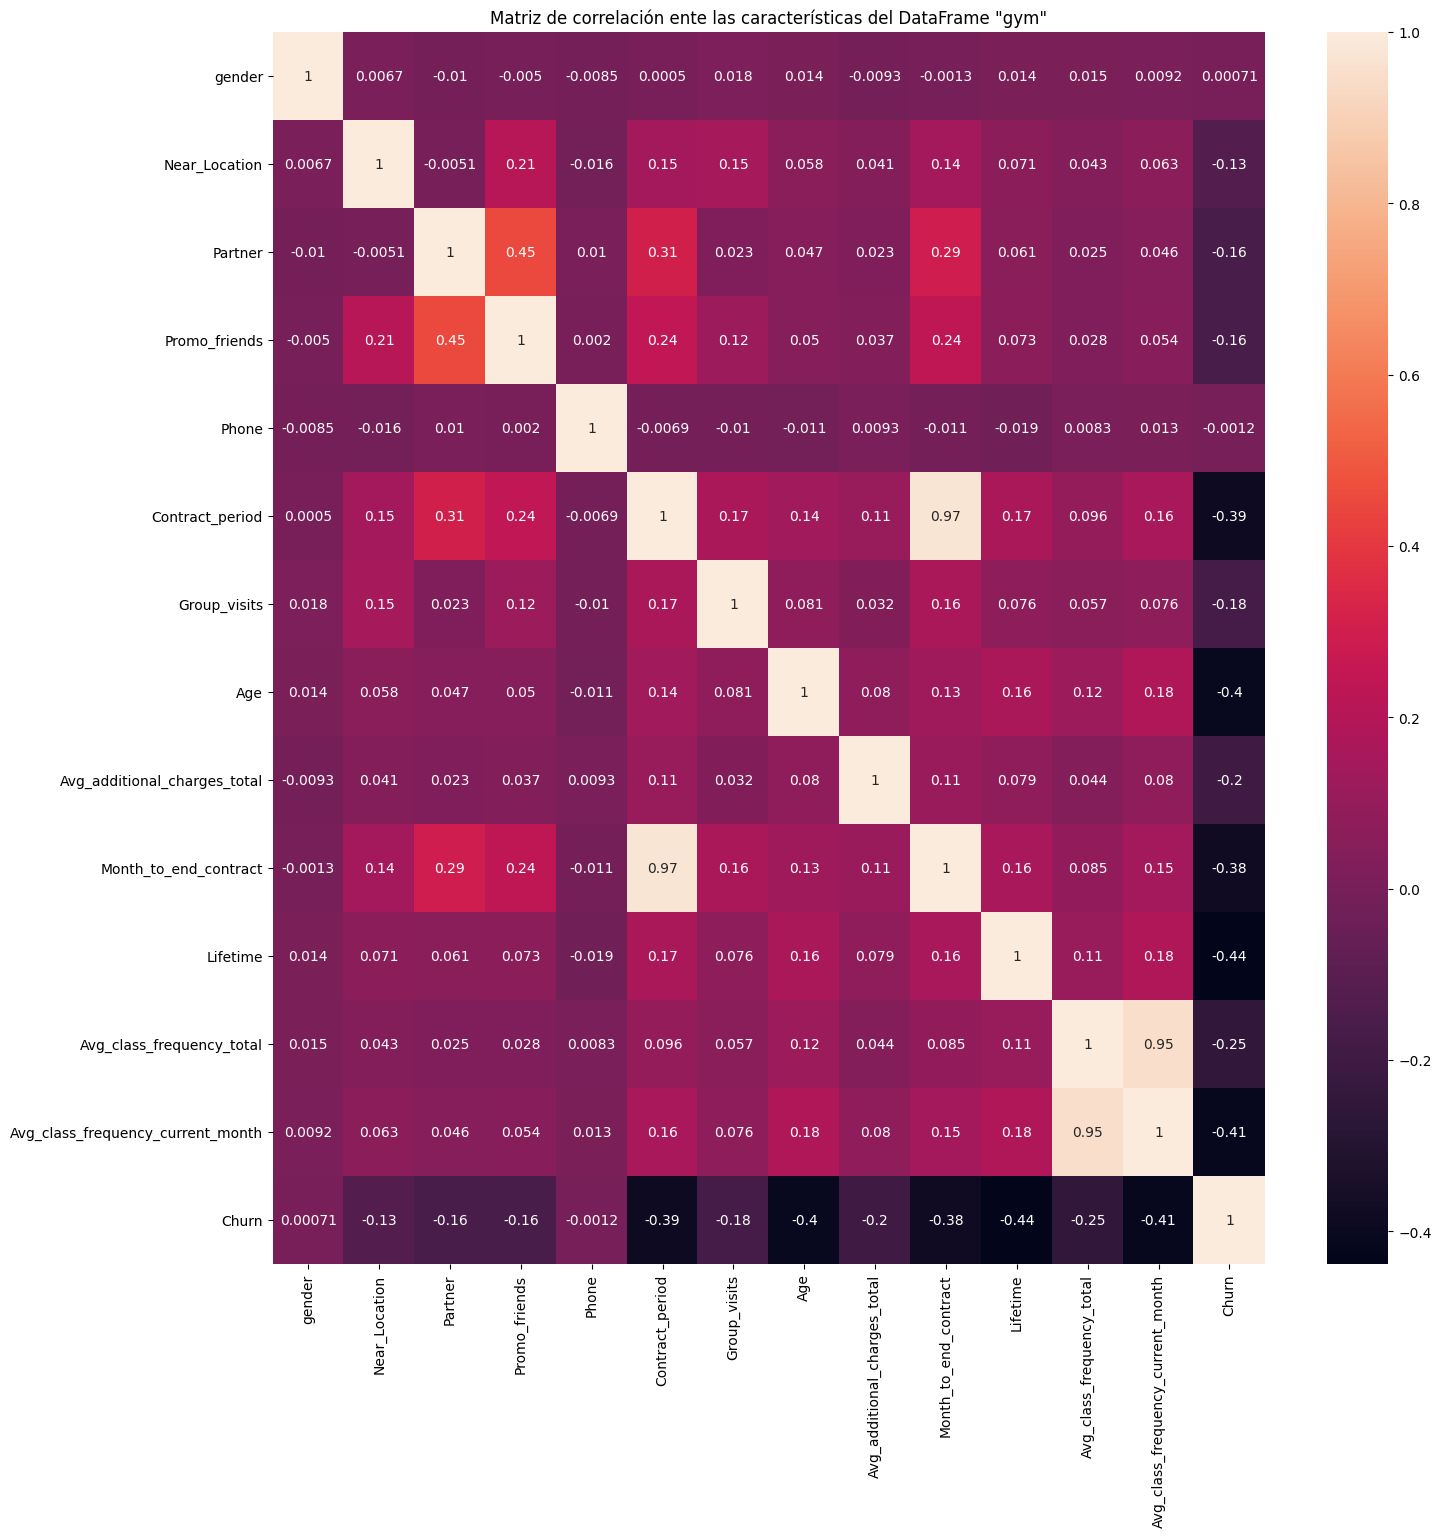

In [13]:
# Mostrar mapa de calor

plt.figure(figsize=(16, 16))
sns.heatmap(gym.corr(), annot=True)
plt.title('Matriz de correlación ente las características del DataFrame "gym"')
plt.show()

Al ser la característica 'Churn' la variable objetivo de este análisis, me centraré en el análisis de esta variable con las otras características.

La correlación de una variavle con otra se considera fuete cuando el valor de la correlación se acerca a 1 o -1. Partiendo de esto, de la 'Matriz de correlación ente las características del DataFrame "gym"' se observa lo siguiente:

1. 'Lifetime'. -0.44. Es la correlación negativa más alta con 'Churn'. Esto puede indicar que entre más tiempo una persona ha sido cliente, menos probabilidad hay de que abandone el gimasio.

2. 'Avg_class_frequency_current_month'. -0.41. Esto indica que a una msyor frecuencia de visitas en el mes actual, se puede relacionar con una menor probabilidad de abandonar por parte de las personas.

3. 'Age'. -0.40. Entre mayor sean los clientes, indica que hay menos posibilidades de que abandonen su vinculo con el gimnasio.

4. 'Contact_period' (-0.39) y 'Month_to_end_contract' (-0.38). Ambas variables también tienen una correlación relativamente fuerte con 'Churn' y puede indicar que las personas con contratos con tiempos más largos son menos probables que abandonen el gimnasio.

Tambien es importante anotar que las variales 'Avg_class_frequency_current_month' y 'Avg_class_frequency_total' tienen una correlación muy fuerte 0.95. Así mismo, las variables 'Contract_period' y 'Month_to_end_contract' tienen una correlación de 0.97.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

## **Paso 3. Construir un modelo para predecir la cancelación de usuarios**

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

### 3.1. Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [14]:
# Divirir los datos

features = gym.drop('Churn', axis=1)

target = gym['Churn']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 13)
(800, 13)
(3200,)
(800,)


### 3.2. Entrena el modelo en el set de entrenamiento con dos métodos:

#### 3.2.1. Regresión logística

In [15]:
# Entrenar regresión logística

lr_model = LogisticRegression(random_state=0)

lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
# Calcular predicciones 

y_proba_lr = lr_model.predict_proba(X_test)

y_pred_lr = lr_model.predict(X_test)

In [17]:
# Evaluar el modelo con las métricas 

print('Exactitud de la regresión:', accuracy_score(y_test, y_pred_lr))
print()
print('Precisión de la regresión:', precision_score(y_test, y_pred_lr))
print()
print('Recall de la regresión:', recall_score(y_test, y_pred_lr))
print()

Exactitud de la regresión: 0.9075

Precisión de la regresión: 0.8195876288659794

Recall de la regresión: 0.803030303030303



### 3.2.2. Bosque aleatorio

In [18]:
# Entrenar bosque aleatorio

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [19]:
# Calcular predicciones 

y_proba_rf = rf_model.predict_proba(X_test)

y_pred_rf = rf_model.predict(X_test)

In [20]:
# Evaluar el modelo con las métricas 

print('Exactitud de la regresión:', accuracy_score(y_test, y_pred_rf))
print()
print('Precisión de la regresión:', precision_score(y_test, y_pred_rf))
print()
print('Recall de la regresión:', recall_score(y_test, y_pred_rf))
print()

Exactitud de la regresión: 0.91625

Precisión de la regresión: 0.8393782383419689

Recall de la regresión: 0.8181818181818182



Analizando los resultados obtenidos de las métricas para ambos modelos Regresión logística y Bosque aleatorio se puede evidenciar que ambos modelos son efectivos para predecir las personas que abandonaran el gimnasio. Sin embargo, el modelo de Bosque aleatorio (RandomForestClassifier) tiene ligeramente mejores resultados en sus métricas haciendolo un poco más exacto en comparación los resultados de Regresión logística.

En Exactitud (Accuracy), el resultado en ambos modelos la diferencia es muy pequeña Regresión logística 0.9075, Bosque aleatorio 0.9162 siendo sutilmente superior por (0,0087). La métrica de exactitud es la métrica que mide la proporción de predecciones correctas tanto para clientes que se quedan como para clientes que cancelan.

En Precisión (Precision), Bosque aleatorio tiene un resultado de 0.8394 siendo ligeramente superior al resultado de Regresión logística 0.8196. Entre mayor sea la precisión significa que cuando el modelo predijo que un cliende abandona, el 84% de las veces fue correcta esta predicción.

En Recall, Bosque aletorio también tiene un resultado 0.8181, ligeramente superior a Regresión logística 0.8030. Entre mayor sea esta métrica, indica que hay una mayor oportunidad de retener a los clientes, que es el objetivo principal del gimnasio Model Fitness.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
</div>

## **Paso 4. Crear clústeres de usuarios/as**

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

### 4.1. Estandariza los datos.

In [21]:
# Estandarizar los datos

sc = StandardScaler()

x_sc = sc.fit_transform(features)

### 4.2. Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

In [22]:
# Crear la matriz de distancias

linked = linkage(x_sc, method='ward')

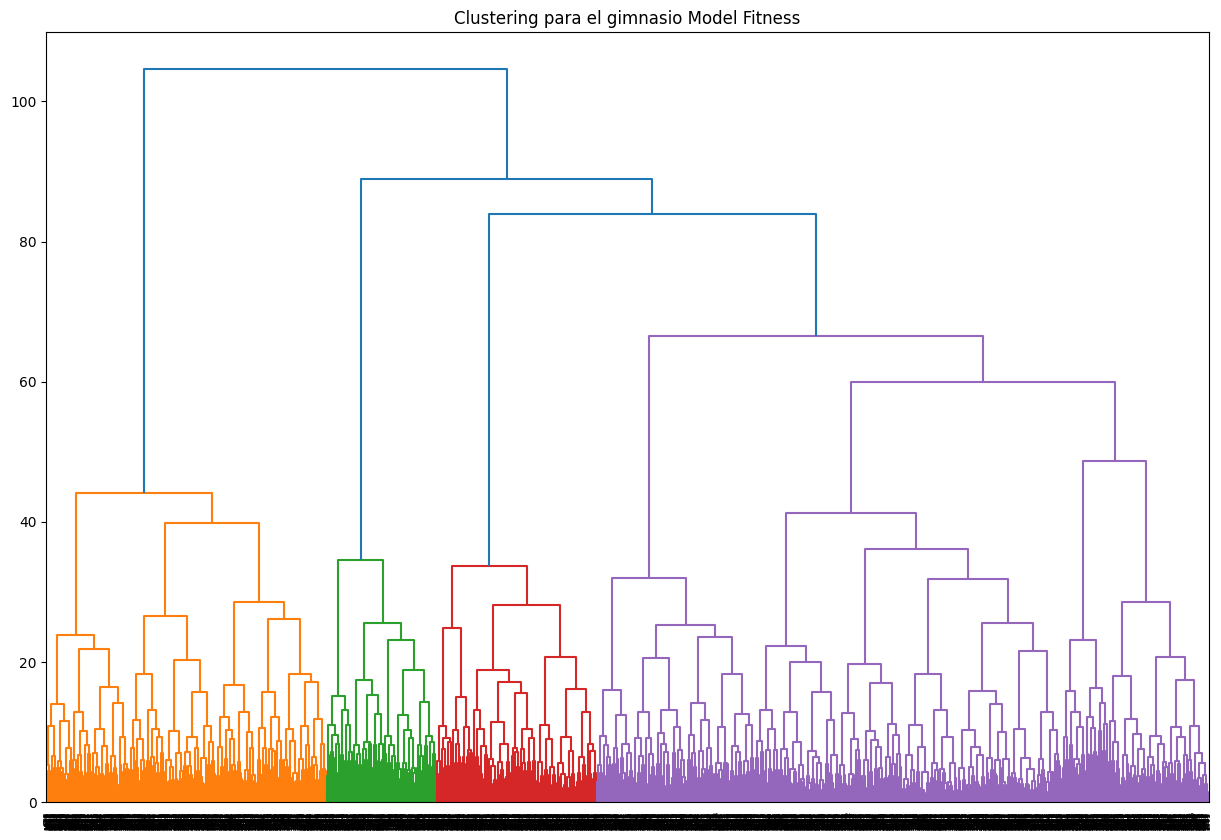

In [23]:
# Crear el dendrograma

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Clustering para el gimnasio Model Fitness')
plt.show()

Del dendrograma "Clustering para el gimnasio Model Fitness" se observa que hay 5 grupos principales que claramente se forman de acuerdo a los 5 colores que aparecen en la gráfica. Estos clústeres representan grupos de clientes con carasterísticas y comportamiento similares entre ellos.

Cada una de las líneas verticales en la dase del gráfico representan a un cliente. Luego se van formando clústeres pequeños de clientes. A medida que se van haciendo agrupaciones más optimas, la altura va aumentando formando clústeres más grandes. La altura de cada grupo indica que tan similares son los clústeres que se combinan, de esta forma se crearon los 5 clústeres para este análisis.


### 4.3. Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [24]:
# Entrenar el modelo de clustering 

km = KMeans(n_clusters=5)

labels = km.fit_predict(features)

In [25]:
# Crear los clústeres

gym['cluster_km'] = labels

### 4.4. Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [31]:
# Calcular los valores medios de las características para los clústeres

gym.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.514091,0.839650,0.451895,0.279883,0.897959,4.301263,0.407191,28.973761,105.932804,3.996113,3.544218,1.852564,1.708264,0.334305
1,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470
2,0.508721,0.824612,0.488372,0.293605,0.907946,4.198643,0.387597,28.908915,35.600722,3.855620,3.394380,1.836755,1.692641,0.349806
3,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
4,0.511435,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611


Basandome en los análisis previos sobre las características que han mostrado tener mayor relevancia en el modelo me centraré en las siguientes: 'Age', 'Contract_period', 'Avg_class_frecuency_total', 'Avg_class_frecuency_current_month', 'Avg_additional_charges_total' y la variable objetivo 'Churn'.

1. Clúster 2. Empezando por la media de la variable 'Churn' se observa que es el valor más alto de media para este Clúster  es 0.35. Las otras medias de la variables de relevancia por el contrario, presenta valores menores con referencias los otros 4 clústeres, de allí se puede concluir que los clientes del Clúster 2 con promedio de edad de 28.9 años son los clientes con mayor probabilidad de irse debido a que son los que menos visitas presenta en el gimnasio a la semana, son los que menos gastan en cargos adicionales y los de periodo de contrato más cortos.

2. Clúster 3. Por otro lado, analizando las medias de la variables más relvantes se encuentra que la tasa de abandono de los clientes de estte grupo 'Churn' 0.044 es la más baja en comparación a los otros clústeres. Caso contrario, pasa con las medias de las otras carasterísticas relevantes para este grupo debido a que son las que mayores valores presentan, es decir, son los clientes que más gastan en serivicios adicionales, tienen contratos de permanencia más largos, presentan mayores visitas a la semana y son lo clientes con un promedio de edad mayor de 29.8 años. Se pede concluir que los clientes de este clúster son los clientes que tienen la menor tasa de abandono y por tanto se pueden considerar como clientes fieles.

### 4.5. Traza distribuciones de características para los clústeres. ¿Notas algo?

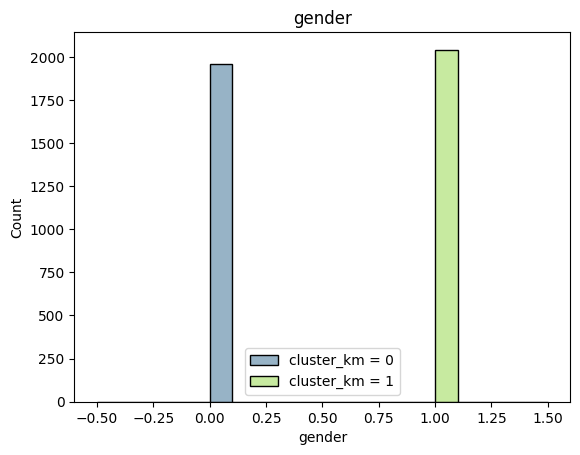

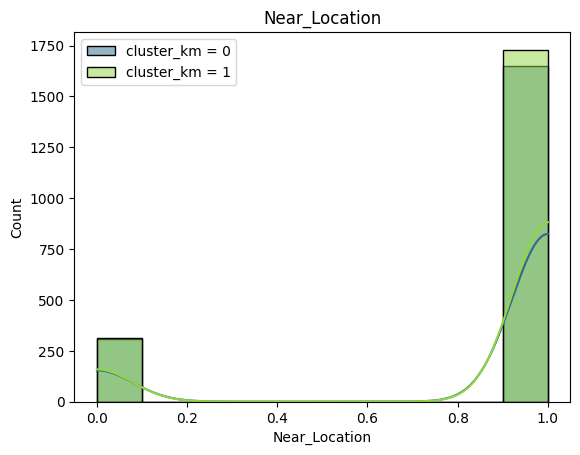

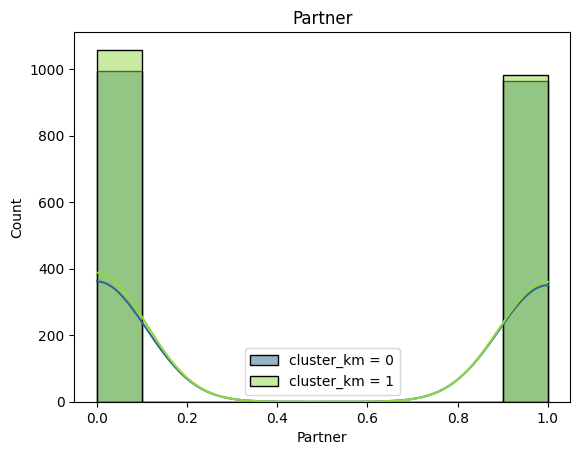

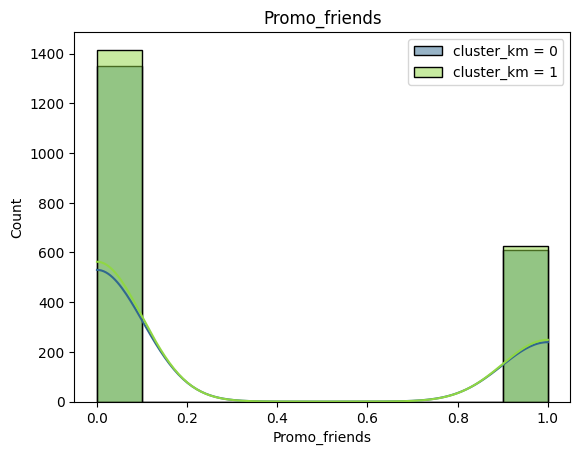

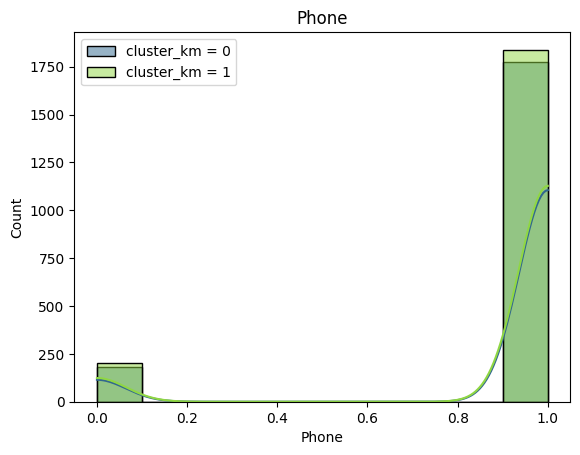

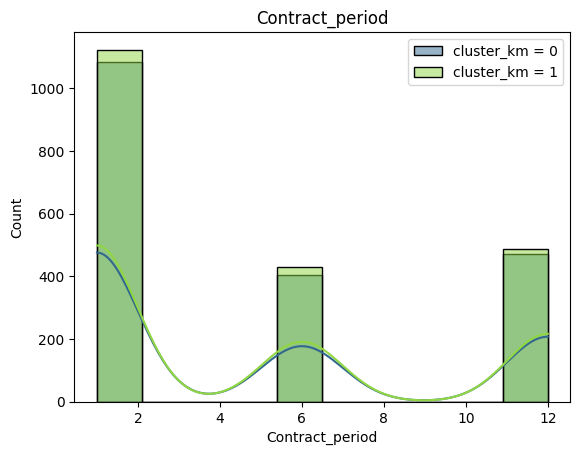

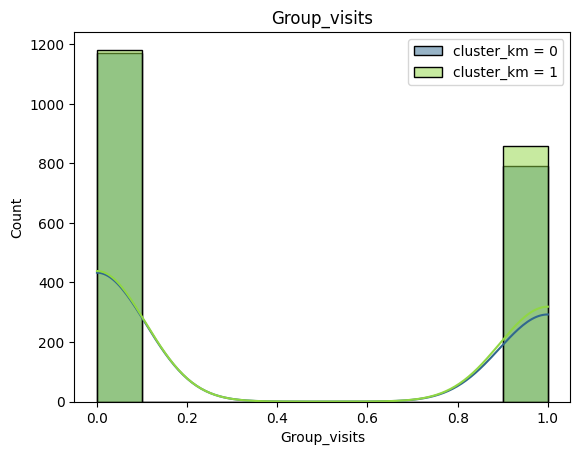

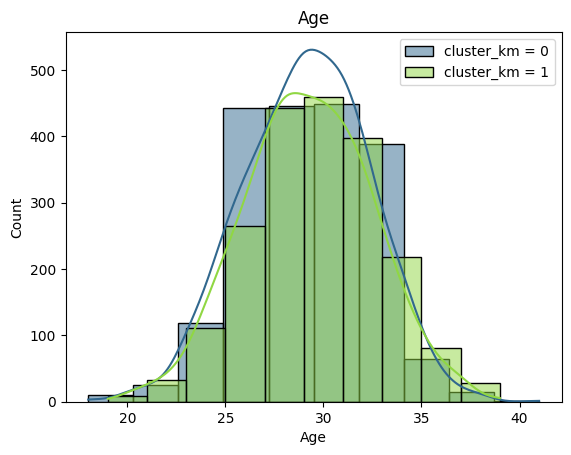

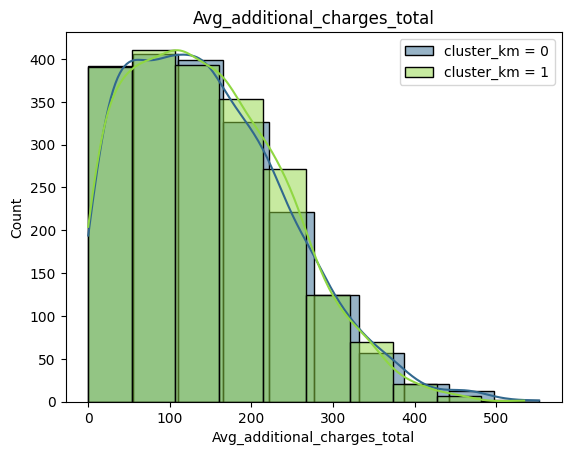

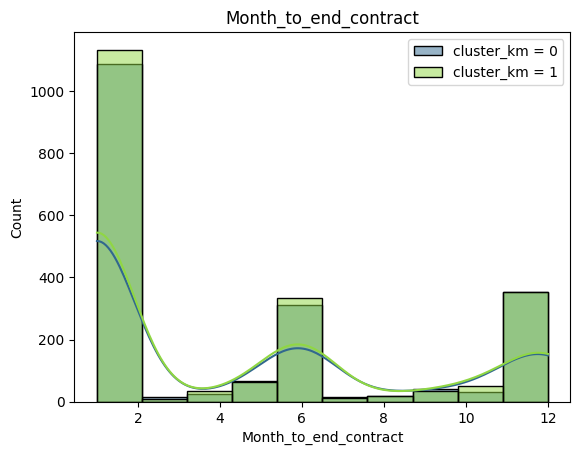

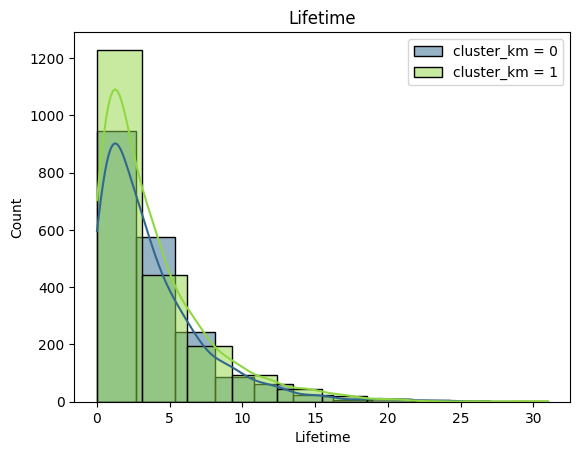

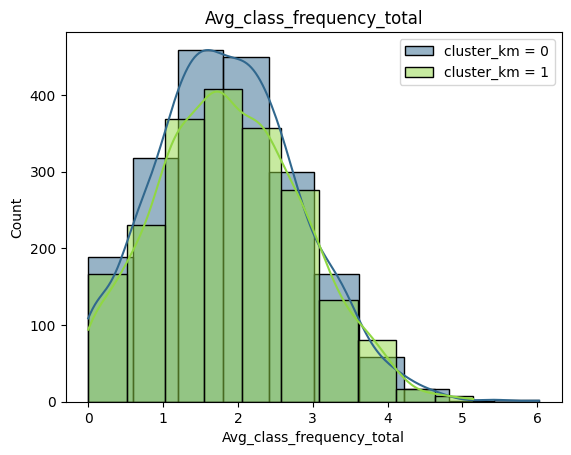

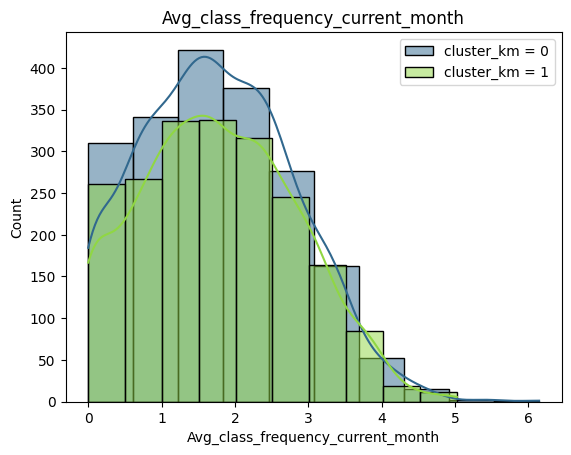

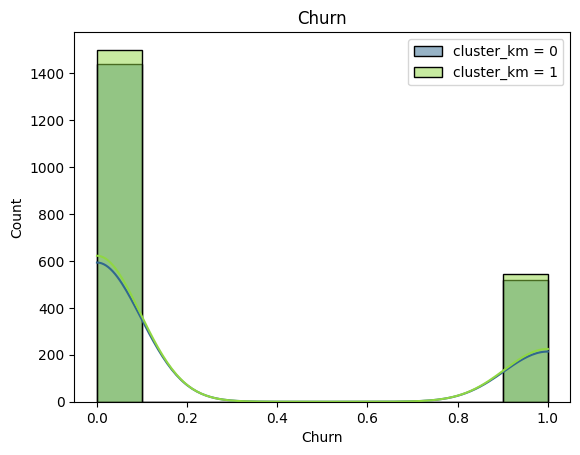

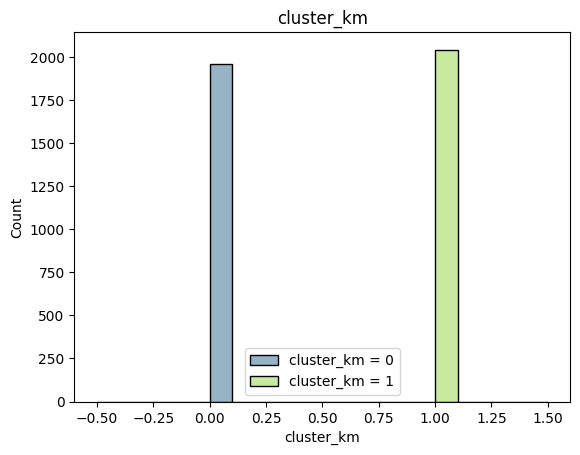

In [27]:
# Crear un histograma de distribución

histogram(gym, 'cluster_km', gym.columns)

Para este análisis consideré las carácterísticas que son más relvantes. Estos histogramas confirman lo que se obtuvo en el análisis de las medias de las características para cada clúster. 

1. 'Avg_class_frequency_current_month' y 'Avg_class_frequency_total'. Los gráficos de frecuencia de visitas muestran que la distribución para el clúster 0 está significativamente desplazada hacia la derecha. Esto puede significar que los clientes en este clúster tienen una frecuencia de visitas más alta que los del clúster 1.

2. 'Lifetime'. El gráfico de Lifetime muestra que el clúster 1 tiene un pico muy pronunciado en los primeros meses. Puede indicar que una gran cantidad de clientes en este grupo abandonan al poco tiempo despúes de entrar al gimnasio. 

3. 'Contract_period'. Este gráfico es importante porque confirma con la barra del primer mes que hay un alto abandono en este tiempo de permanecian en el gimnasio  con contrato de muy corta duración. El clúster 0 tiene distribuciones más equilibradas entre los contratos de 6 y 12 meses.

4. 'Avg_additional_charges_total'. Aquí se muestra que el clúster 0 tiene una distribución de gastos más alta, mientras que el Clúster 1 se concentra en un gasto mucho más bajo. Esto puede indicar que los clientes pertenecientes al clúster 0 presentan un mayor vínculo con el gimnasio al usar más servicios.

5. 'Partner' y 'Promo_friends'. Ambos gráficos de Partner y Promo_friends muestran que el Clúster 0 tiene una mayor proporción de clientes que se unieron por medio de un socio o amigo, esto que indica que al resentar opciones de finliación con un conocidoes importante para la retención de usuarios.

### 4.6. Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [30]:
gym.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.514091,0.839650,0.451895,0.279883,0.897959,4.301263,0.407191,28.973761,105.932804,3.996113,3.544218,1.852564,1.708264,0.334305
1,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470
2,0.508721,0.824612,0.488372,0.293605,0.907946,4.198643,0.387597,28.908915,35.600722,3.855620,3.394380,1.836755,1.692641,0.349806
3,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
4,0.511435,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611


De la tabla anterior y al ser la característica 'Churn' una variable binaria con valores 0 o 1, se puede asumir que su media puede proporcionar las tasas (en porcentaje) de cada uno de lo clústeres

- Clúster 0. Tasa de cancelación del 33.43%
- Clúster 1. Tasa de cancelación del 17.85%
- Clúster 2. Tasa de cancelación del 34.98%
- Clúster 3. Tasa de cancelación del 4.43%
- Clúster 4. Tasa de cancelación del 22.66%
  
Para responder a las preguntas planteadas en este punto se concluye que sí hay  diferencia en las tasas de cancelación.

Los grupos con mayor tasa de cancelación son el clúster 2 (34.98%), seguido por el clúster 0 (33.43%). Por lo tanto, son los grupos de clientes que tienen un alto riesgo de cancelación. 

Los grupos que presentan una tasa de cancelación similar son clúster 1 (17.85%) y el clúster 4 (22.66%). Llo clientes de este grupo presentan una tasa de cancelación intermedia.

Por otro lado, los clientes pertenecientes al clúster 3, son los que presentan la menor tasa de cancelación 4.43%, una vez más se confirma que los clientes de este grupo son los clientes ideales del Gym Model Fitness.

En resumen, el análisis de la tasa de cancelación te permite ver de manera clara y cuantitativa la diferencia en el comportamiento de cada grupo. El Clúster 2 es el que debe ser el foco principal de las estrategias de retención, mientras que el Clúster 3 debe ser el modelo a seguir para las iniciativas de compromiso de clientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
</div>

## **Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes**

Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

**Conclusiones y Recomendaciones**

Después de haber realizado un análisis de cuerdo a las caraterísticas y los datos de abandono de los clientes se puede concluir y recomendar lo siguiente:

1. Los clientes que hacer parte del clúster 2 son los más propensos al abandono. Este grupo se caracteriza por ser los clientes un poco más jóvenes y que abandonan prácticamente el primer de contrato de su membresía. Por lo tanto es importante, que a estos clientes que se podrian considerar como clientes nuevos por sus medias de permanencia en el gimnasio crear estrategias para que conozcan mejor todos los serivicios ofrecidos en Model Fitness y la facilidad para acceder a ellos. Enviarles mensajes personalizados de motivación y/o programación de clases grupales.

2. También es importante seguir con los planes y programas que incluyen menbresias dobles o en grupo de amigos. El factor social al parecer es importante para la retención de clientes, el gym se puede convertir en un espacio donde te puedas encontrar con tus amigos y pasar un tiempo de calidad apoyándosen mutuamente a cumplir sus metas e incluso a ponersen retos y objetivos de quien los puede cumplir primero.

3. Reforzar la tasa de retención de contratos para los clientes fieles y de mayor permanencia. Crear enganches como bonos o descuentos en algunos servicios para clientes que lleven un cierto tiempo de membresía para así seguir afianzando lo que los identifica con el Gym Model Fitness a permanecer en el. Por ejemplo dándoles a los antiguos clientes la oportunidad de invitar a un amigo y obtener beneficios mutuos.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Las conclusiones en cada sección quedaron impecables dejando un proceso de análisis súper claro de inicio a fin, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>